## Regular expression operations

A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern. Python has a built-in package called re, which can be used to work with Regular Expres-sions.

You can find details here: https://docs.python.org/3/library/re.html#regular-expression-syntax


In [327]:
import re 
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt


#### 1. Write a regexp to extract the score, Cristiano’s age, number of goals and the number of selections from the following text:

In [328]:
txt = "Buteur face au Qatar (3-0), samedi en amical, Cristiano Ronaldo (36 ans) a fait tomber un nouveau record. En effet, l'attaquant de Manchester United, meilleur buteur de l'histoire des sélections (112 buts), est devenu le footballeur européen le plus capé avec son équipe nationale. Il compte désormais 181 matchs avec la formation lusitanienne, soit un de plus que Sergio Ramos avec l'Espagne. Le Red Devil n'est plus qu'à cinq longueurs de Bader Ahmed al-Mutawa (Koweït), recordman absolu à l'échelle mondiale."

In [329]:
# Define the regex patterns
score_pattern = r'(\d+-\d+)'
age_pattern = r'\((\d+) ans\)'
goals_pattern = r'\((\d+) buts\)'
selections_pattern = r'(\d+) matchs'


In [330]:
# Extract the information using the regex patterns
score_match = re.search(score_pattern, txt)
age_match = re.search(age_pattern, txt)
goals_match = re.search(goals_pattern, txt)
selections_match = re.search(selections_pattern, txt)
print(score_match, age_match, goals_match, selections_match)

<re.Match object; span=(22, 25), match='3-0'> <re.Match object; span=(64, 72), match='(36 ans)'> <re.Match object; span=(195, 205), match='(112 buts)'> <re.Match object; span=(302, 312), match='181 matchs'>


In [331]:
# Extract the information from the match objects
score = score_match.group(1) if score_match else None
age = int(age_match.group(1)) if age_match else None
goals = int(goals_match.group(1)) if goals_match else None
selections = int(selections_match.group(1)) if selections_match else None

In [332]:
# Print the results
score, age, goals, selections

('3-0', 36, 112, 181)

#### 2. Write a regexp to get prices from the following text:

In [333]:
txt = "Vous cherchez un nouvel ordinateur portable performant, fiable et en réduction ? Sur Rakuten, l’ordinateur Apple MacBook Air 2020 est en promotion, avec une remise de près de 230 euros pour un tarif final qui chute sous les 900 euros grâce à la plateforme marchande."

In [334]:
# Define the regex pattern
price_pattern = r'(\d+ euros)'

In [335]:
# Extract the information using the regex pattern
price_match = re.findall(price_pattern, txt, re.IGNORECASE)

In [336]:
# Print the result
price_match

['230 euros', '900 euros']

#### 3. Write a regexp to get reduction values, along with promo code:

In [337]:
txt = """
- 40% sur tous les réservoirs d'essence et collecteurs d'échappement ( achats internet uniquement ) avec le code promo: PRINTEMPS

- 40% sur tous les carénages plastique  ( achats internet uniquement ) avec le code promo: CARENAGE40

- 50% sur toutes les rampes d'injection ( achats internet uniquement ) avec le code promo: INJECTION50
"""

In [338]:
# Define the regex pattern
pattern = r'(\d+%) sur .+? avec le code promo: ([A-Z0-9]+)'

In [339]:
# Extract the information using the regex pattern
matches = re.findall(pattern, txt)

In [340]:
# Print the result
matches

[('40%', 'PRINTEMPS'), ('40%', 'CARENAGE40'), ('50%', 'INJECTION50')]

# Web scrapping

# Parsing the HTML with BeautifulSoup

BeautifulSoup is a Python library for parsing HTML and XML documents. It is often used for web scraping. BeautifulSoup transforms a complex HTML document into a complex tree of Python objects, such as tag, navigable string, or comment.

### Téléthon use case (read, store, visualize)
https://www.afm-telethon.fr/fr/le-telethon/le-telethon-c-est-quoi/l-histoire-du-telethon/les-resultats-du-telethon

In [341]:
url        = "https://www.afm-telethon.fr/fr/le-telethon/le-telethon-c-est-quoi/l-histoire-du-telethon/les-resultats-du-telethon"
requesting = requests.get(url)
soup       = BeautifulSoup(requesting.content, "html.parser")


In [342]:

with open('tst.html', 'w') as f:
    f.write(str(soup))

    

## Let's look for some information in the page

#### 1. In 2006, the counter reached its highest level. Extract this information from the webpage (a sentence in the page).

In [343]:
# Using CSS selectors
paragraphs_with_2006_css = [p.get_text() for p in soup.select('p:-soup-contains("2006")')]

In [344]:
paragraphs_with_2006_css

["C'est en 2006 que le compteur a atteint son niveau le plus haut, avec 106 696 532 €.\xa0"]

In [345]:
# Using tags 
potential_paragraphs = [p.get_text() for p in soup.select('p') if '2006' in p.get_text()]

In [346]:
potential_paragraphs

["C'est en 2006 que le compteur a atteint son niveau le plus haut, avec 106 696 532 €.\xa0"]

#### 2. Retrieve the publication date from the webpage, using the CSS classes.

In [347]:
potential_pub_elements = soup.find_all(['time', 'date'], string=lambda text: any(char.isdigit() for char in text))

In [348]:
pub_classes = [element.parent.get('class') for element in potential_pub_elements if element.parent.get('class')]

In [349]:
publication_dates_css = {}
for cls in pub_classes:
    class_name = ' '.join(cls)
    publication_dates_css[class_name] = [element.get_text() for element in soup.select(f'.{class_name}')]

In [350]:
publication_dates_css

{'date': ['\n                  Publié le 09/06/2022, mis à jour le 19/06/2023']}

#### 3. Find the number of tables defined in the soup. 

In [351]:
number_of_tables = len(soup.find_all('table'))

In [352]:
number_of_tables

1

#### 3. Retrieve the items from this table. Create a python dataframe representing this table (do not forget to include the name of the columns as defined in the webpage).

In [353]:
table_html = str(soup.select('table'))
df = pd.read_html(StringIO(table_html))[0]
df.head(36)

,Année,Montant collecté
0,1987,29 650 000 €
1,1988,28 490 000 €
2,1989,40 930 000 €
3,1990,46 510 000 €
4,1991,38 650 000 €
5,1992,47 870 000 €
6,1993,55 600 000 €
7,1994,57 520 000 €
8,1995,56 763 000 €
9,1996,56 872 000 €


#### 4. Clean up columns and their types 
(it's up to you to propose how, why and what to do)

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Année             36 non-null     int64 
 1   Montant collecté  36 non-null     object
dtypes: int64(1), object(1)
memory usage: 708.0+ bytes


In [355]:
df['Année'] = df['Année'].astype(int)
df.rename(columns={'Montant collecté': 'Montant collecté (en euros)'}, inplace=True)
df['Montant collecté (en euros)'] = df['Montant collecté (en euros)'].str.replace(r'\W', '', regex=True)
df['Montant collecté (en euros)'] = df['Montant collecté (en euros)'].str.replace(' ', '').astype(int)
df.head(36)

,Année,Montant collecté (en euros)
0,1987,29650000
1,1988,28490000
2,1989,40930000
3,1990,46510000
4,1991,38650000
5,1992,47870000
6,1993,55600000
7,1994,57520000
8,1995,56763000
9,1996,56872000


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Année                        36 non-null     int32
 1   Montant collecté (en euros)  36 non-null     int32
dtypes: int32(2)
memory usage: 420.0 bytes


#### 5. Retrieve the date when the most amount was collected 

(we already scrapped the info before, here we want the info with the table)

In [357]:
maxYear = df[df['Montant collecté (en euros)'] == df['Montant collecté (en euros)'].max()]['Année']

In [358]:
maxYear

19    2006
Name: Année, dtype: int32

#### 6. Visualize the evolution of the amount collected per year.
#### Mark the maximum and minimum of the evolution with respectively red and green colors.

In [359]:
minYear = df[df['Montant collecté (en euros)'] == df['Montant collecté (en euros)'].min()]['Année']
maxvalue = df['Montant collecté (en euros)'].max()
minvalue = df['Montant collecté (en euros)'].min()

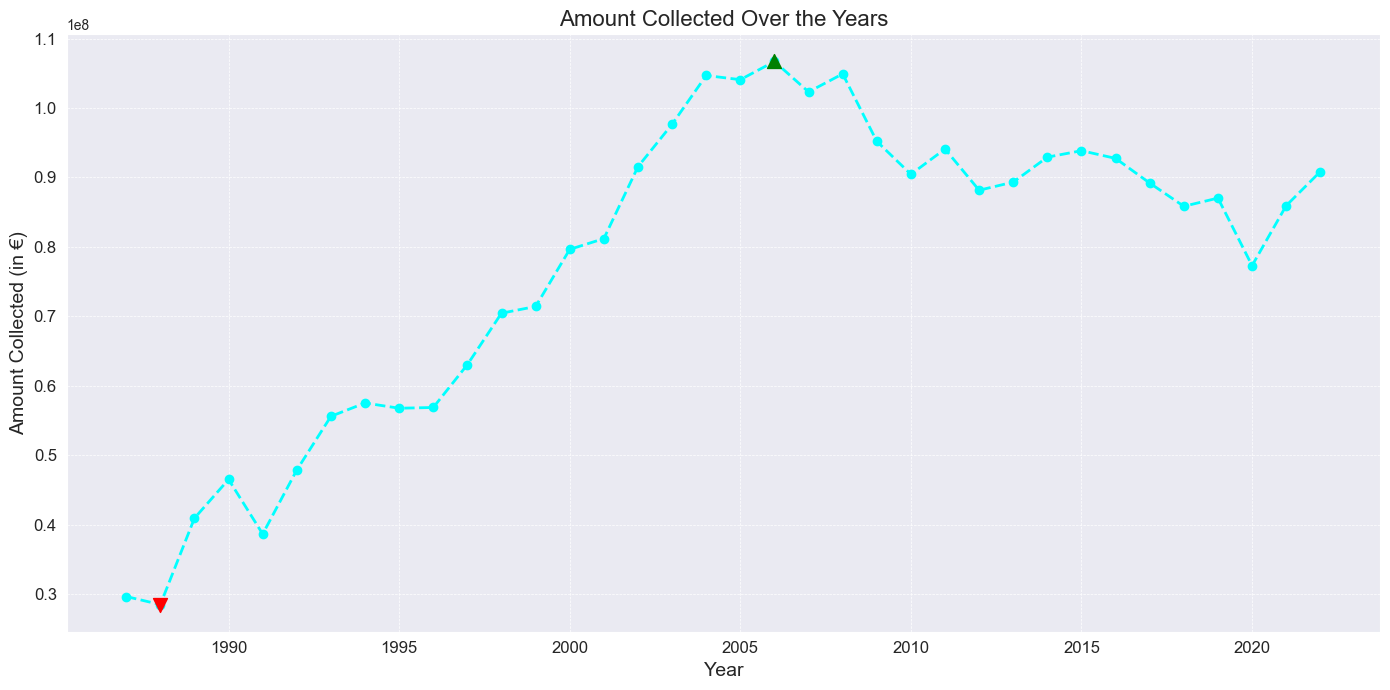

In [360]:
plt.figure(figsize=(14, 7))
plt.plot(df['Année'], df['Montant collecté (en euros)'], marker='o', color='cyan', linestyle='dashed', linewidth=2)
plt.scatter(maxYear, maxvalue, color='green', s=100, zorder=5, label='Maximum', marker='^')
plt.scatter(minYear, minvalue, color='red', s=100, zorder=5, label='Minimum', marker='v')


# Setting the style elements
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Amount Collected Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount Collected (in €)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()


# Displaying the plot
plt.show()

## 7. Bonus question: We expect the graph bellow:

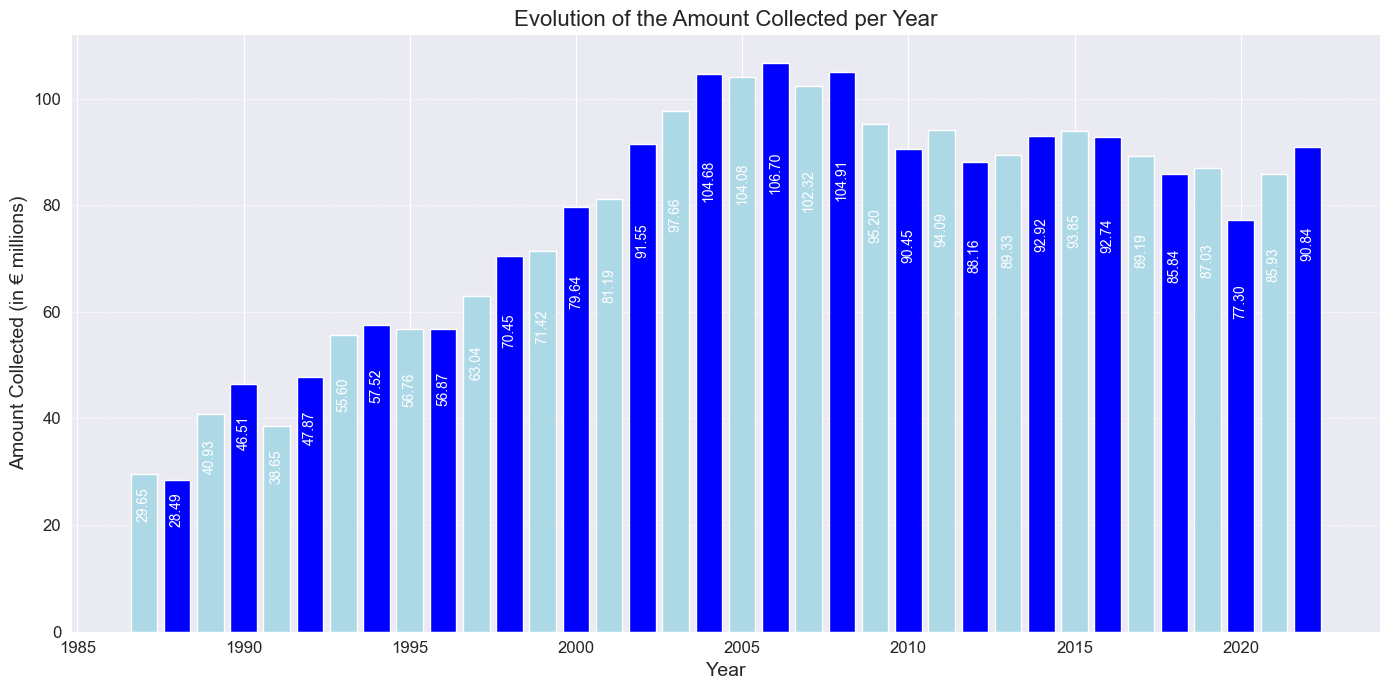

In [361]:
# Generating the bar plot with alternating shades of blue
colors = ['lightblue' if i % 2 == 0 else 'blue' for i in range(len(df))]

# Generating the bar plot with alternating shades of blue and values inside the columns
plt.figure(figsize=(14, 7))
bars = plt.bar(df['Année'], df['Montant collecté (en euros)']/1e6, color=colors)

# Displaying the values inside each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, 0.8*height - (0.03 * max(df['Montant collecté (en euros)']/1e6)), '%.2f' % height, ha='center', va='bottom', fontsize=10, color='white', rotation=90)

# Setting the style elements
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.title('Evolution of the Amount Collected per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount Collected (in € millions)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Displaying the plot
plt.show()

## Use case 2: https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html

In [362]:
url   = "https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html"
page  = requests.get(url )
html  = page.text
soup  = BeautifulSoup(html)

#### Convert the table of this site into a pandas dataframe

You must include the names of the columns and the names of the rows (the hours) as an index 

### To help you: Define a function that allows you to retrieve the value of row i and column j of the table

In [363]:
table_html = str(soup.select('table'))
df = pd.read_html(StringIO(table_html))[1]
df.head(36)

,Heure locale,Unnamed: 1,Température,Pluie,Vent,Humidité,Bio-météo,Pt. de rosée,Pression,Visibilité
0,01h,add_circle_outline,13.9 °C 13.9 → 14.3,0 mm/1h,14 km/h raf.32.4,76%,NaN,9.7 °C,1023hPa,20 km
1,00h,add_circle_outline,14.3 °C 14.3 → 14.9,0 mm/1h,18 km/h raf.37.8,73%,NaN,9.5 °C,1023.2hPa,20 km
2,23h,add_circle_outline,14.9 °C 14.7 → 14.9,0 mm/1h,14 km/h raf.39.6,69%,NaN,9.3 °C,1023.0hPa,20 km
3,22h,add_circle_outline,14.8 °C 14.8 → 15.4,0 mm/1h,18 km/h raf.34.2,67%,NaN,8.7 °C,1022.8hPa,20 km
4,21h,add_circle_outline,15.4 °C 15.4 → 16.8,0 mm/1h,14 km/h raf.45.7,62%,NaN,8.2 °C,1022.2hPa,20 km
5,20h,add_circle_outline,16.8 °C 16.8 → 17.8,0 mm/1h,22 km/h raf.42.8,59%,81.0,8.7 °C,1021.6hPa,20 km
6,19h,add_circle_outline,17.7 °C 17.6 → 18.2,0 mm/1h,18 km/h raf.37.8,51%,144.0,7.4 °C,1021.1hPa,20 km
7,18h,add_circle_outline,17.8 °C 17.7 → 18.3,0 mm/1h,18 km/h raf.35.6,51%,192.0,7.5 °C,1021.0hPa,20 km
8,17h,add_circle_outline,18.3 °C 18.1 → 18.7,0 mm/1h,14 km/h raf.34.6,49%,311.0,7.4 °C,1020.8hPa,20 km
9,16h,add_circle_outline,18.3 °C 17.9 → 19,0 mm/1h,18 km/h raf.36.4,52%,378.0,8.3 °C,1020.7hPa,20 km


In [364]:
df = df.drop(columns=['Unnamed: 1'])

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Heure locale  24 non-null     object 
 1   Température   24 non-null     object 
 2   Pluie         24 non-null     object 
 3   Vent          24 non-null     object 
 4   Humidité      24 non-null     object 
 5   Bio-météo     12 non-null     float64
 6   Pt. de rosée  24 non-null     object 
 7   Pression      24 non-null     object 
 8   Visibilité    24 non-null     object 
dtypes: float64(1), object(8)
memory usage: 1.8+ KB


In [366]:
df['Heure locale']=df['Heure locale'].str.replace('h', '')
df['Heure locale']=df['Heure locale'].map(lambda x: int(x))
df = df.sort_values(by='Heure locale', ascending=True)

In [367]:
df.info()
df.head(36)

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1 to 2
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Heure locale  24 non-null     int64  
 1   Température   24 non-null     object 
 2   Pluie         24 non-null     object 
 3   Vent          24 non-null     object 
 4   Humidité      24 non-null     object 
 5   Bio-météo     12 non-null     float64
 6   Pt. de rosée  24 non-null     object 
 7   Pression      24 non-null     object 
 8   Visibilité    24 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.9+ KB


,Heure locale,Température,Pluie,Vent,Humidité,Bio-météo,Pt. de rosée,Pression,Visibilité
1,0,14.3 °C 14.3 → 14.9,0 mm/1h,18 km/h raf.37.8,73%,NaN,9.5 °C,1023.2hPa,20 km
0,1,13.9 °C 13.9 → 14.3,0 mm/1h,14 km/h raf.32.4,76%,NaN,9.7 °C,1023hPa,20 km
23,2,15.8 °C 15.8 → 16.5,0 mm/1h,14 km/h raf.35.3,69%,NaN,10.1 °C,1021.6hPa,20 km
22,3,15.0 °C 15 → 15.8,0 mm/1h,11 km/h raf.26.6,77%,NaN,11 °C,1021.3hPa,20 km
21,4,14.6 °C 14.6 → 15,0 mm/1h,11 km/h raf.21.6,80%,NaN,11.2 °C,1021.2hPa,20 km
20,5,14.7 °C 14.6 → 14.7,0 mm/1h,11 km/h raf.21.2,82%,NaN,11.7 °C,1020.7hPa,20 km
19,6,14.8 °C 14.7 → 14.8,0 mm/1h,7 km/h raf.26.3,83%,NaN,11.9 °C,1020.4hPa,20 km
18,7,14.4 °C 14.4 → 14.8,0 mm/1h,7 km/h raf.24.1,85%,NaN,11.9 °C,1020.3hPa,20 km
17,8,14.3 °C 14.1 → 14.3,0 mm/1h,7 km/h raf.19.4,86%,3.0,12 °C,1020.6hPa,20 km
16,9,14.9 °C 14.3 → 14.9,0 mm/1h,7 km/h raf.24.5,84%,NaN,12.2 °C,1020.6hPa,20 km


In [368]:
df.set_index('Heure locale')

,Température,Pluie,Vent,Humidité,Bio-météo,Pt. de rosée,Pression,Visibilité
Heure locale,,,,,,,,
0,14.3 °C 14.3 → 14.9,0 mm/1h,18 km/h raf.37.8,73%,NaN,9.5 °C,1023.2hPa,20 km
1,13.9 °C 13.9 → 14.3,0 mm/1h,14 km/h raf.32.4,76%,NaN,9.7 °C,1023hPa,20 km
2,15.8 °C 15.8 → 16.5,0 mm/1h,14 km/h raf.35.3,69%,NaN,10.1 °C,1021.6hPa,20 km
3,15.0 °C 15 → 15.8,0 mm/1h,11 km/h raf.26.6,77%,NaN,11 °C,1021.3hPa,20 km
4,14.6 °C 14.6 → 15,0 mm/1h,11 km/h raf.21.6,80%,NaN,11.2 °C,1021.2hPa,20 km
5,14.7 °C 14.6 → 14.7,0 mm/1h,11 km/h raf.21.2,82%,NaN,11.7 °C,1020.7hPa,20 km
6,14.8 °C 14.7 → 14.8,0 mm/1h,7 km/h raf.26.3,83%,NaN,11.9 °C,1020.4hPa,20 km
7,14.4 °C 14.4 → 14.8,0 mm/1h,7 km/h raf.24.1,85%,NaN,11.9 °C,1020.3hPa,20 km
8,14.3 °C 14.1 → 14.3,0 mm/1h,7 km/h raf.19.4,86%,3.0,12 °C,1020.6hPa,20 km
